# Sorting and Searching

### Binary Search

In [5]:
def binary_search(arr, key):
    """
    Assumes the arr is sorted in increasing order
    O(logn) time complexity
    """
    if len(arr) == 0 or key == arr[0]:
        return 0
    low = 0
    high = len(arr)
    while low <= high:
        mid = low + (high - low) // 2
        if arr[mid] < key:
            low = mid + 1
        elif arr[mid] > key:
            high = mid - 1
        else:
            return mid
    return -1

print(binary_search([4, 6, 10], 10))
print(binary_search([1, 2, 3, 4, 5, 6, 7], 5))
print(binary_search([10, 11, 12], 2))

2
4
-1


### Binary Search Application
* https://leetcode.com/problems/time-based-key-value-store/
* See [Python](python.ipnb) for binary search application using the bisect built-in

In [6]:
from collections import defaultdict
from bisect import bisect_right
class TimeMap:

    # approach #1

    # use a hashmap
    # key: [(timestamp, value), (timestamp, value)]

    # approach #2

    def __init__(self):
        self.lookup = defaultdict(list)

    def set(self, key: str, value: str, timestamp: int) -> None:
        # timestamp increases with each successive call,
        # so we can just append and they will be sorted
        # by timestamp in increasing order

        # create two defaultdicts for timestamps and values

        # we could use one lookup with a list of tuples
        # where lookup[key] = [(timestamp, value), (timestamp1, value1)]
        # but bisect only provides the key parameter in python 3.10+

        self.lookup[key].append((timestamp, value))


    def get(self, key: str, timestamp: int) -> str:
        if self.lookup.get(key) is None:
            return ""

        # If the last (and greatest) timestamp for this key is smaller
        # than the timestamp requested, return the last timestamp
        if self.lookup[key][-1][0] < timestamp:
            return self.lookup[key][-1][1]

        low = 0
        high = len(self.lookup[key]) - 1

        while low <= high:
            mid = low + (high - low) // 2
            if self.lookup[key][mid][0] < timestamp:
                low = mid + 1
            elif self.lookup[key][mid][0] > timestamp:
                high = mid - 1
            else:
                # found it, return the value
                return self.lookup[key][mid][1]
        # since low is 0, no values <= timestamp exist in the array for this key
        if low == 0:
            return ""
        # the exact timestamp was not found, but since we completed binary search
        # we know that all values < low are <= the desired timestamp,
        # so we return the value just to the left of low
        return self.lookup[key][low-1][1]  # all values <= to timestamp are to the left of low


[Master Theorem with explanation (pdf)](media/master_theorem.pdf)

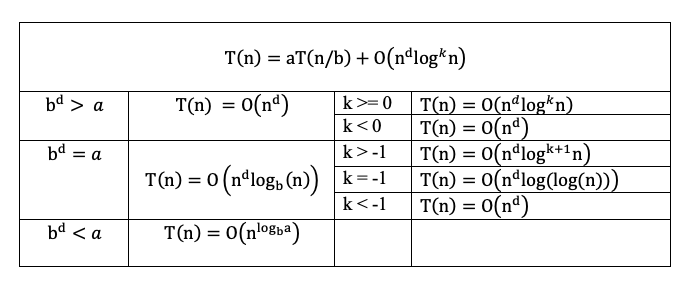

In [4]:
from IPython import display

display.Image("media/master_theorem.png")

### Mergesort (Divide and Conquer)

$T(n) = aT(n/b) + O(n^{d}log^k{n})$

* a = number of subproblems in the recursion
* n/b = the size of each subproblem
* $O(n^{d}log^k{n})$ = complexity of the merge

$T(n) = 2T(n/2) + O(n) $

- therefore, $b^d = a$ since b = 2, d = 1, a = 2

$T(n) = O(nlogn)$

In [4]:
def merge_sort(arr):
    """
    The merge sort algorithm
    """
    if len(arr) > 1:

        # Finding the middle index of the array
        n = len(arr)

        A = arr[:n//2]
        B = arr[n//2:]

        # recursively sort each half.
        # This breaks the problem down into two subproblems (a = 2) each of size (n/2), so b = 2
        merge_sort(A)
        merge_sort(B)

        # i = the idx for iterating over A
        # j = the idx for iterating over B
        # k = the idx we are at in the merged array
        i = j = k = 0

        # arr is copied over to A[...] and B[...]
        # so we overwrite
        while i < len(A) and j < len(B):
            if A[i] < B[j]:
                arr[k] = A[i]
                i += 1
            else:
                arr[k] = B[j]
                j += 1
            k += 1

        # at this point either we've added all elements of A or B to the result, arr.
        # we need to add the left over elements which are guaranteed to be both
        # pre-sorted in increasing order and larger than the last element of arr

        # add remaining elements from A
        while i < len(A):
            arr[k] = A[i]
            i += 1
            k += 1

        # add remaining elements from B
        while j < len(B):
            arr[k] = B[j]
            j += 1
            k += 1


# Driver Code
arr = [12, 11, 13, 5, 6, 7]
print("Given array is")
print(arr)
merge_sort(arr)
print("Sorted array is: ")
print(arr)


Given array is
[12, 11, 13, 5, 6, 7]
Sorted array is: 
[5, 6, 7, 11, 12, 13]


#### Mergesort application

Get max profit from array of prices

See other string / array solution [here](string_array.ipynb).

In [5]:
def max_profit(arr):
    """
    Called recursively to find the max profit possible
    of a single buy and sell order

    @param arr: List[float] list of stock prices
    @return: max profit, lowest price, highest price
    """
    n = len(arr)
    if n == 1:
        return 0, arr[0], arr[0]

    A = arr[:n//2]
    B = arr[n//2:]

    price_a, low_a, high_a = max_profit(A)
    price_b, low_b, high_b = max_profit(B)

    return max(price_a, price_b, high_b - low_a), min(low_a, low_b), max(high_a, high_b)

arr = [10, 12, 17, 3, 9]
profit, lowest_price, highest_price = max_profit(arr)

print(f"Prices: {arr}\n"
      f"Max profit {profit},\n"
      f"Lowest price: {lowest_price},\n"
      f"Highest price: {highest_price}. ")


Prices: [10, 12, 17, 3, 9]
Max profit 7,
Lowest price: 3,
Highest price: 17. 


### Quicksort (Divide and Conquer)

```
quicksort(arr, low, high):
"""
arr: array to sort
low: left index for sort, typically 0
high: right index for sort, typically last index in array
"""
    if (low < high) //
        pivot = partition(arr, low, high)
        quicksort(arr, low, pivot - 1)
        quicksort(arr, pivot + 1, high)

partition(arr, low, high)
"""rearranges arr from low to high in place"""

```
Sources:
* https://www.geeksforgeeks.org/quicksort-using-random-pivoting/
* https://towardsdatascience.com/quicksort-in-python-dbefa7dcf9cc
* https://www.geeksforgeeks.org/quick-sort/

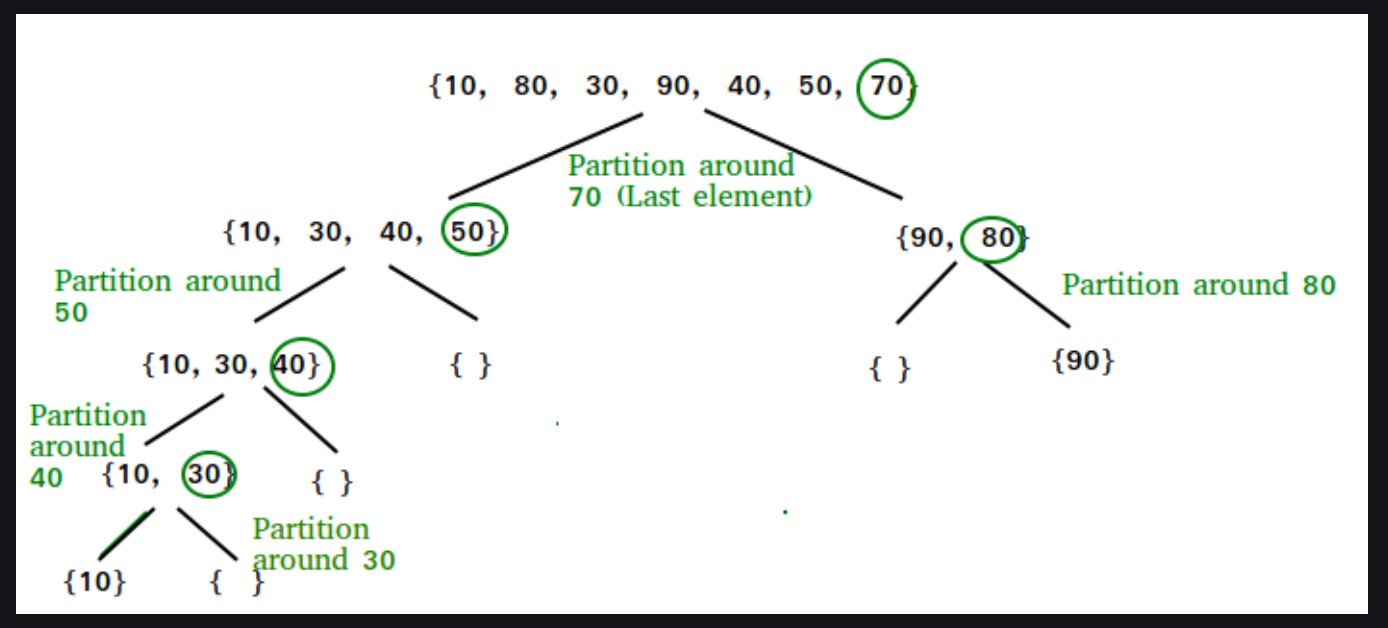

In [6]:
from IPython import display
display.Image("media/quicksort.png")

In [60]:
from typing import List
import random

def partition_rand(arr: List[int], low: int, high: int):

    # select a random pivot
    pivot_idx = random.randrange(low, high)

    # swap pivot and the last element to ensure
    # pivot is the last element of the array
    arr[high], arr[pivot_idx] = arr[pivot_idx], arr[high]

    return partition(arr, low, high)


def partition(arr: List[int], low: int, high: int):
    """
    Rearranges arr in place from low to high
    """
    # partition around the last element
    pivot_idx = high
    pivot = arr[pivot_idx]

    # i will hold first index of any element that is
    # greater than or equal to the pivot
    # initially, potentially no elements are greater
    # than the pivot, so we set i = low - 1
    i = low - 1

    # move all elements less than the pivot
    # to the left of the pivot
    for j in range(low, high):
        # if current elem is smaller than the pivot
        if arr[j] < pivot:
            i += 1
            # we don't know what's at arr[i],
            # but we know arr[j] is less than pivot
            # swap elems at i and j and keep going
            arr[i], arr[j] = arr[j], arr[i]

    # now any elements starting at i + 1 are greater than
    # or equal to the pivot
    # move the pivot to i + 1
    arr[i+1], arr[pivot_idx] = arr[pivot_idx], arr[i+1]

    # the pivot now resides at index i + 1
    return i + 1

def quicksort(arr, low, high):
    """
    In-place sorting algorithm using a pivot
    to partition elements
    """
    if low < high:
        # pivot index
        # select a random pivot between low and high
        pi = partition_rand(arr, low, high)
        # choose arr[high] as the pivot
        # pi = partition(arr, low, high)
        quicksort(arr, low, pi - 1)
        quicksort(arr, pi + 1, high)


a = [5,4,3,6,7,9]
quicksort(a, low=0, high=len(a)-1)
a

[3, 4, 5, 6, 7, 9]

In [61]:
a = [9, -3, 5, 2, 6, 8, -6, 1, 3]
quicksort(a, low=0, high = len(a)-1)
a

[-6, -3, 1, 2, 3, 5, 6, 8, 9]

### Find median of two sorted arrays (mergesort application)


In [12]:

from typing import List

class Solution:
    def findMedianSortedArrays(self, nums1: List[int], nums2: List[int]) -> float:
        # [1, 2, 3, 4]
        # [1, 2, 3, 4, 5, 6]
        # 1. Merged the sorted arrays into a single sorted array
        # 2. If the # elements is even, return avg between two middle elements
        # 3. If the # elements is odd, return the middle element
        # Time: O(n+m) since we must iterate over both arrays
        # Space: O(n+m) since we must store the merged array separately
        if len(nums1) > len(nums2):
            nums1, nums2 = nums2, nums1

        # nums1 is the shortest length

        n = len(nums1)
        m = len(nums2)

        is_even = False
        if (n + m) % 2 == 0:
            is_even = True

        i = 0
        j = 0

        merged = []
        while i < n and j < m:
            if nums1[i] < nums2[j]:
                merged.append(nums1[i])
                i += 1
            else:
                merged.append(nums2[j])
                j += 1

        while i < n:
            merged.append(nums1[i])
            i += 1

        while j < m:
            merged.append(nums2[j])
            j += 1

        z = len(merged)
        if is_even:
            return (merged[(z // 2) - 1] + merged[z // 2]) / 2
        return merged[z // 2]

Solution().findMedianSortedArrays([1,2], [3,4])


2.5

In [13]:
Solution().findMedianSortedArrays([1,3], [2])

2

### Find median of two sorted arrays (binary search application)

In [15]:
class Solution:
    def findMedianSortedArrays(self, nums1: List[int], nums2: List[int]) -> float:
        """
        Source: https://www.youtube.com/watch?v=q6IEA26hvXc&t=510s
        Time complexity: O(log(n+m))
        Space complexity: O(1)

        1. Finding a pivot point where all elements to the left are smaller and all
        elements to the right are greater, you can find the median

        x x [x]|[x] x x  long_l, long_r
          y [y]|[y] y    short_l, short_r

        x x [y] [x] | [y] y [x] x x

        2. Any pivot point in the smaller array has a corresponding point on the
        large array, that divides the total # of elements in two

        x x x x x x
          y y y y

        3. After picking a pivot point, it's possible to determine whether we need to
        go left or right

        1 2 3|4 5 6
          2 3|4 5

        Code Outline
        1. Binary search on small array
        2. Get indices of long_l, long_r, short_l, short_r
        3. Get direction we need to do binary search in (left (-1) or right (1) or 0 means we've found the right pivot)
        4. At the end, calculate the median

        """


        if len(nums1) > len(nums2):
            nums1, nums2 = nums2, nums1

        n = len(nums1)
        m = len(nums2)
        total = n + m

        half =  total // 2

        # binary search over best pivot in nums1
        # pivot in nums2 is determined from pivot in nums1
        low = 0
        high = len(nums1) - 1
        while True:
            mid_nums1 = low + (high - low) // 2
            mid_nums2 = half - mid_nums1 - 2

            short_l = nums1[mid_nums1] if mid_nums1 >= 0 else float("-inf")
            short_r = nums1[mid_nums1+1] if mid_nums1+1 < n else float("inf")
            long_l = nums2[mid_nums2] if mid_nums2 >= 0 else float("-inf")
            long_r = nums2[mid_nums2+1] if mid_nums2+1 < m else float("inf")

            # if partition is correct, determine result
            if short_l <= long_r and long_l <= short_r:
                if total % 2 == 0:
                    # determine two middle elements and then calculate their average
                    return (max(short_l, long_l) + min(short_r, long_r)) / 2
                # odd: it's the smaller element of the right hand partitions
                # 1|2 3
                # 1|2
                # 1 1 2 2 3
                return min(short_r, long_r)
            elif short_l > long_r:
                # x x [x]|[x] x x  long_l, long_r
                #   y [y]|[y] y    short_l, short_r
                high = mid_nums1 - 1
            elif long_l > short_r:
                # x x [x]|[x] x x  long_l, long_r
                #   y [y]|[y] y    short_l, short_r
                low = mid_nums1 + 1


Solution().findMedianSortedArrays([1,2], [3,4])



2.5

In [16]:
Solution().findMedianSortedArrays([1,3], [2])

2

### 1146. Snapshot Array

Implement a SnapshotArray that supports the following interface:

SnapshotArray(int length) initializes an array-like data structure with the given length.  Initially, each element equals 0.
void set(index, val) sets the element at the given index to be equal to val.
int snap() takes a snapshot of the array and returns the snap_id: the total number of times we called snap() minus 1.
int get(index, snap_id) returns the value at the given index, at the time we took the snapshot with the given snap_id

```
Example 1:

Input: ["SnapshotArray","set","snap","set","get"]
[[3],[0,5],[],[0,6],[0,0]]
Output: [null,null,0,null,5]
Explanation:
SnapshotArray snapshotArr = new SnapshotArray(3); // set the length to be 3
snapshotArr.set(0,5);  // Set array[0] = 5
snapshotArr.snap();  // Take a snapshot, return snap_id = 0
snapshotArr.set(0,6);
snapshotArr.get(0,0);  // Get the value of array[0] with snap_id = 0, return 5
```

In [1]:
from pprint import pprint
import bisect
from collections import defaultdict

class SnapshotArray:
    # Keep track of history of each element in a dictionary mapping
    # indexes to a list of snap_ids and values:
    # {
    #   0: [[0, 0], [0, 3]],
    #   1: [[0, 0], [0, 2]],
    #   2: [[0, 0]],
    #}


    def __init__(self, length: int):
        self.snapshots = defaultdict(list)
        for i in range(length):
            self.snapshots[i] = [[0, 0]]
        self.snap_id = 0

    def set(self, index: int, val: int) -> None:
        self.snapshots[index].append([self.snap_id, val])

    def snap(self) -> int:
        ans = self.snap_id
        self.snap_id += 1
        return ans

    def get(self, index: int, snap_id: int) -> int:
        # O(logn) - binary search
        # Get the idx of the last occurrence of the requested snap_id
        # by getting the first index where all elements are less than snap_id + 1
        # and then subracting one from that index
        idx_last_snap_id = bisect.bisect(self.snapshots[index], [snap_id + 1]) - 1
        return self.snapshots[index][idx_last_snap_id][1]

# Your SnapshotArray object will be instantiated and called as such:
# obj = SnapshotArray(length)
# obj.set(index,val)
# param_2 = obj.snap()
# param_3 = obj.get(index,snap_id)
a = SnapshotArray(length=3)

a.set(0, 1)
a.set(0, 2)
a.set(1, 2)
pprint(a.snapshots)

defaultdict(<class 'list'>,
            {0: [[0, 0], [0, 1], [0, 2]],
             1: [[0, 0], [0, 2]],
             2: [[0, 0]]})


In [2]:
arr = [20, 21, 22, 22, 23, 24]
#                   ^ we need the last index of the snapshot in the SnapshotArray class above
idx_greater_than_x = bisect.bisect(arr, x=22)
idx_greater_than_x

4

In [3]:
idx_last_val_of_x = bisect.bisect(arr, x=22) - 1
idx_last_val_of_x

3

### Search an element in a sorted and rotated array

Source: [https://www.geeksforgeeks.org/search-an-element-in-a-sorted-and-pivoted-array/](https://www.geeksforgeeks.org/search-an-element-in-a-sorted-and-pivoted-array/)
```
Input: arr[] = {5, 6, 7, 8, 9, 10, 1, 2, 3}; key = 3
Output: Found at index 8
```

Approach
1. Find the pivot point with binary search. It's the only index where the next element is smaller
2. Divide the array into two sub-arrays
3. Perform binary search

In [27]:

class Solution:

    @staticmethod
    def find_pivot(arr: List[int]) -> int:
        """
        Finds index where dropoff occurs
        e.g. 3,4,5,1,2 would return 2 since that is the index of the pivot, 5
        """

        low = 0
        high = len(arr) - 1
        n = len(arr)

        while low <= high:
            mid = low + (high - low) // 2
            if mid + 1 < n and arr[mid] > arr[mid + 1]:
                # found pivot at mid
                return mid
            elif mid - 1 > 0 and arr[mid] < arr[mid - 1]:
                # found pivot at mid - 1
                return mid-1
            elif arr[low] >= arr[mid]:
                # element furthest left >= element at mid, set high one less than mid
                # drop-down is left so search left
                high = mid - 1
            else:
                # element further right < element at mid, set low to one above mid
                # drop down is right so search right
                low = mid + 1
        return -1


    def search(self, arr: List[int], key: int) -> int:

        if len(arr) < 1:
            return -1

        if len(arr) == 1:
            if arr[0] == key:
                return 0
            else:
                return -1

        pivot = Solution.find_pivot(arr)

        if arr[pivot] < key or arr[pivot+1] > key:
            return -1


        if pivot == -1:
            low = 0
            high = len(arr) - 1
        elif arr[0] <= key:
            low = 0
            high = pivot
        else:
            low = pivot+1
            high = len(arr) - 1

        if arr[low] == key:
            return low

        while low <= high:
            mid = low + (high - low) // 2
            if arr[mid] < key:
                low = mid + 1
            elif arr[mid] > key:
                high = mid - 1
            else:
                return mid
        return -1


print(Solution().find_pivot([3,4,5,1,2]))
print(Solution().find_pivot([2,3,4,5,1]))
print(Solution().find_pivot([5,1,2,3,4]))
print(Solution().find_pivot([0,1,2,3,4]))

a = [3,4,5,1,2]
print(f"Index of {1} in {a} is {Solution().search(a, 1)}")
a = [2,3,4,5,1]
print(f"Index of {1} in {a} is {Solution().search(a, 1)}")
a = [5,1,2,3,4]
print(f"Index of {1} in {a} is {Solution().search(a, 1)}")
a = [0,1,2,3,4]
print(f"Index of {1} in {a} is {Solution().search(a, 1)}")
a = [4,5,6,7,0,1,2]
print(f"Index of {0} in {a} is {Solution().search(a, 0)}")


2
3
0
-1
Index of 1 in [3, 4, 5, 1, 2] is 3
Index of 1 in [2, 3, 4, 5, 1] is 4
Index of 1 in [5, 1, 2, 3, 4] is 1
Index of 1 in [0, 1, 2, 3, 4] is 1
Index of 0 in [4, 5, 6, 7, 0, 1, 2] is 4


### Bubble Sort


Repeatedly swap elements until they are all in place
Time Complexity (Worst): O(n^2), Worst case occurs when array is reverse sorted.
Best time Complexity: O(n) when the array is already sorted
Space Complexity: O(1)

Source: [https://www.geeksforgeeks.org/bubble-sort/](https://www.geeksforgeeks.org/bubble-sort/)


In [33]:
def bubble_sort(arr):
    n = len(arr)

    for i in range(n):
        swapped = False
        for j in range(0, n-i-1):

            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                swapped = True

        if not swapped:
            break

    return arr

bubble_sort([8,7,6,5,4,3,2,1])

[1, 2, 3, 4, 5, 6, 7, 8]

### Insertion Sort

Algorithm:

1. Iterate over the array
2. Compare the current element to its predecessor
3. While the current element is less than it's predecessor, swap left

Time complexity: O(n^2)
Space complexity: O(1)

Source: [https://www.geeksforgeeks.org/insertion-sort/](https://www.geeksforgeeks.org/insertion-sort/)

In [36]:
def insertion_sort(arr: List[int]) -> List[int]:

    n = len(arr)

    for i in range(n):

        j = i-1

        while j >= 0 and arr[j] > arr[i]:
            arr[i], arr[j] = arr[j], arr[i]
            i -= 1
            j -= 1

    return arr

insertion_sort([9,8,7,6,5,4,3,2,1])

[1, 2, 3, 4, 5, 6, 7, 8, 9]

### Insertion Sort Linked List Example Problem
[https://leetcode.com/problems/insertion-sort-list/](https://leetcode.com/problems/insertion-sort-list/)


In [40]:
from typing import Optional
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
class Solution:
    def insertionSortList(self, head: Optional[ListNode]) -> Optional[ListNode]:

        # Time Complexity: O(n^2)
        # Space Complexity: O(1)
        # Insertion sort
        # for each node, while it's greater than the previous node swap it (right) with the previous node
        # head  5, 1, 3, 2
        # result

        # head 1, 3, 2       head  3, 2     head  2            head
        # result 5           result 1, 5    result 1, 3, 5     result 1, 2, 3, 5

        result = ListNode()
        curr = head

        while curr:

            prev = result

            # iterate over the resultant linked list and
            # find the first position to insert the node there
            # where the current node is greater
            while prev.next and prev.next.val < curr.val:
                prev = prev.next

            tmp = curr.next

            # insert the current node into the resultant linked list between prev and prev.next
            # point prev -> curr -> prev.next
            curr.next = prev.next
            prev.next = curr

            curr = tmp

        return result.next

head = ListNode(5)
head.next = ListNode(4)
head.next.next = ListNode(3)
head.next.next.next = ListNode(2)
head.next.next.next.next = ListNode(1)
print(id(head))
result = Solution().insertionSortList(head)
print(id(result))
while result:
    print(result.val)
    result = result.next

4500558656
4500559712
1
2
3
4
5


### 834. Guess the Word

Source: [https://leetcode.com/problems/guess-the-word/](https://leetcode.com/problems/guess-the-word/)

In [ ]:
# """
# This is Master's API interface.
# You should not implement it, or speculate about its implementation
# """
# class Master:
#     def guess(self, word: str) -> int:

class Solution:
    def findSecretWord(self, wordlist: List[str], master: 'Master') -> None:

        # Observations

        # If we get back a score of 0, eliminate all words that share > 0 letter positions in common with the last guessed word
        # If we get back a score of 6, have our answer
        # If we get back a score of 1-5, the correct word will have the same number of letter positions in common with the
        # last guessed word as what was returned as the score.

        # Approach

        # 1. Make a function that filters the wordslist by the words that have
        # at least x number of exact value and position matches as the input word

        # 2. Guess a random word from the wordlist

        def get_matches(word1: str, word2: str) -> bool:
            # len(word1) == len(word2) since all words are of length 6
            n = len(word1)

            result = 0
            for i in range(n):
                if word1[i] == word2[i]:
                    result += 1
            return result

        random.seed(100)

        for _ in range(10):
            guess = wordlist[random.randint(0, len(wordlist) - 1)]
            score = master.guess(guess)

            if score == 6:
                return guess

            i = 0
            while i < len(wordlist):
                matches = get_matches(guess, wordlist[i])
                if score == 0 and matches > 0:
                    wordlist.pop(i)
                elif 0 < score < 6 and matches != score:
                    wordlist.pop(i)
                else:
                    i += 1